![alt text](Task.JPG "Задание")

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative

%matplotlib inline
# Stiff equation https://en.wikipedia.org/wiki/Stiff_equation
class SEq:
    def __init__(self, epsilon = 0.001):
        self.x0 = 1.0
        self.t0 = 0.0
        self.func = lambda x, t: 0# lambda x, t: -x
        self.exact_sol = lambda x: 0 # lambda x: np.exp(-x)
        self.epsilon = 0.001
        self.a = 10
        self.b = 2
        self.c = 2
        self.d = 10

    def xRight(self,x, y):
        return 998 * x + 1998 * y

    def yRight(self,x, y):
        return -999 * x - 1999 * y 
    
    def f(self, pos, t):
        return (self.xRight(pos[0], pos[1]), self.yRight(pos[0], pos[1]))

class Solver:
    def step(self, input, func, t, dt):
        return 0

# explicit solver
class EulerSolver(Solver):
    def step(self, input, func, t, dt):
        f = func(input, t)
        return (input[0] + dt * f[0], input[1] + dt * f[1])

# implicit solver
class ImpSolver(Solver):
    def step(self, input, func, t, dt):
        u = input[0]
        v = input[1]
        return ((u + 1998 * dt * v / (1 - (-1999) * dt)) / (1 - 998 * dt - (-999) * 1998 * dt*dt / (1 - (-1999) * dt)),
                (v + (-999) * dt * u) / (1 - (-1999) * dt)) 

In [97]:
def simulate(solver, x, y, dt, end_time, equation):
    result = list()
    current_pos = (x, y)
    t = 0.
    while t < end_time:
        result.append(current_pos)
        current_pos = solver.step(current_pos, equation.f, t, dt)
        t += dt
    return result

In [98]:
dt = 0.00001
end_time = 0.01
equation = SEq()
start_pos = (-0.1, 0.1)

In [99]:
explicit_solution = simulate(EulerSolver(), start_pos[0], start_pos[1], dt, end_time, equation)
implicit_solution = simulate(ImpSolver(), start_pos[0], start_pos[1], dt, end_time, equation)

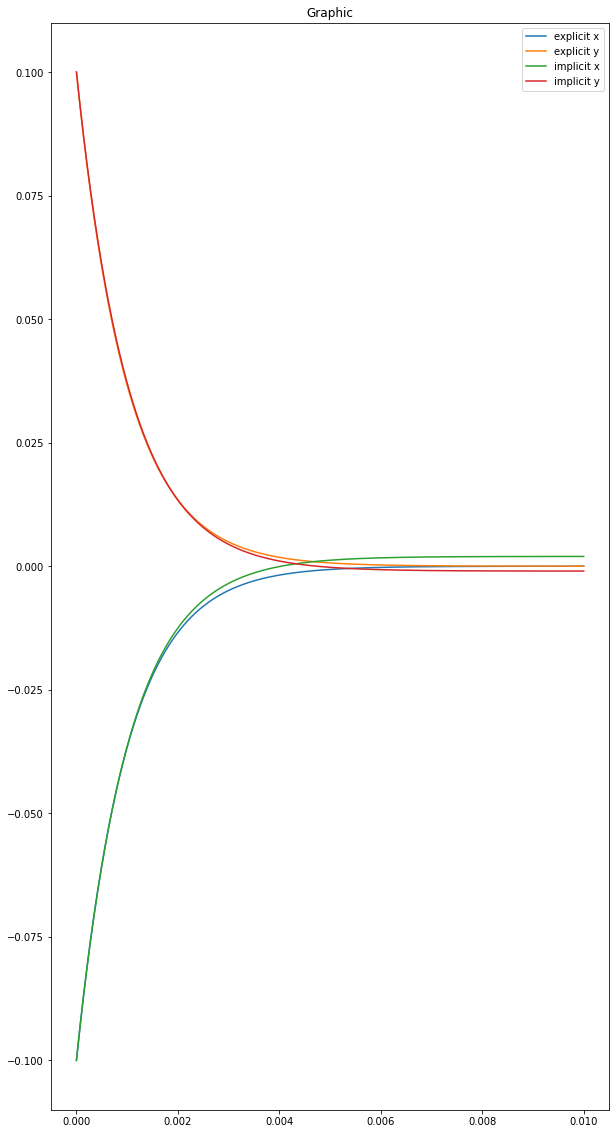

In [101]:
x_list = list()
exp_x = list()
exp_y = list()
imp_x = list()
imp_y = list()
for i in range(len(explicit_solution)):
    exp_x.append(explicit_solution[i][0])
    exp_y.append(explicit_solution[i][1])
    imp_x.append(implicit_solution[i][0])
    imp_y.append(implicit_solution[i][1])
    x_list.append(dt * i)
plt.rcParams['figure.figsize'] = [10, 20]
fig, ax = plt.subplots()
plt.title("Graphic")
ax.plot(x_list, exp_x, label = "explicit x")
ax.plot(x_list, exp_y, label = "explicit y")
ax.plot(x_list, imp_x, label = "implicit x")
ax.plot(x_list, imp_y, label = "implicit y")
ax.legend()

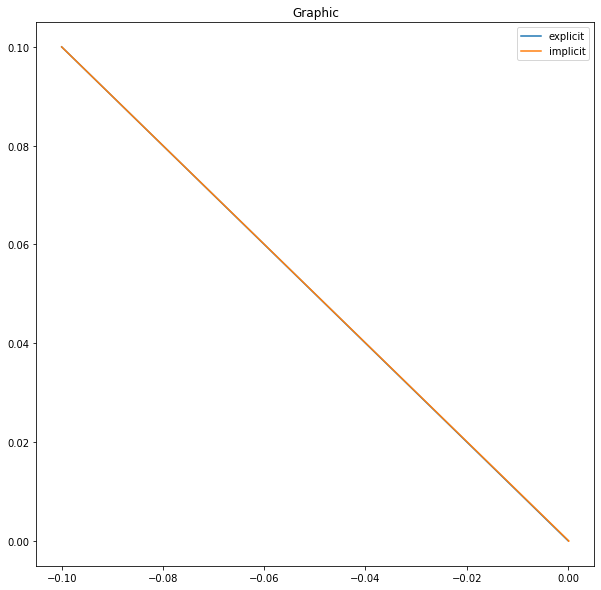

In [67]:
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
plt.title("Graphic")
ax.plot(exp_x, exp_y, label = "explicit")
ax.plot(imp_x, imp_y, label = "implicit")
ax.legend()